In [1]:
"""
Plots bar charts for motif count changes
"""
import os
import sys

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import pandas as pd

sys.path.insert(0, os.path.abspath('../'))

plt.rcParams["font.family"] = "Helvetica"
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

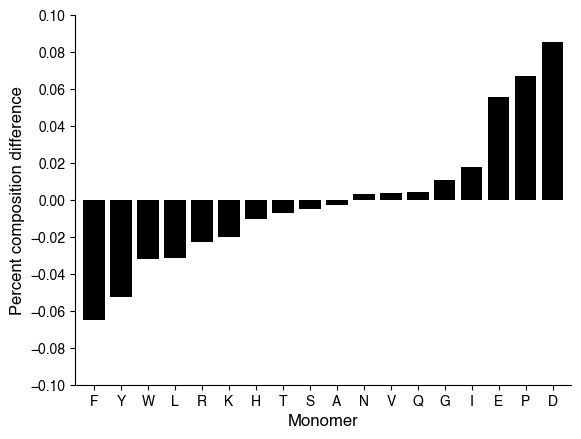

In [2]:
# Monomers

s1_mon_df = pd.read_csv(f'../seq/monomer/S1_monomer_freq.txt').set_index('Monomer')
s4_mon_df = pd.read_csv(f'../seq/monomer/S4_monomer_freq.txt').set_index('Monomer')
monomer_change = s4_mon_df - s1_mon_df
monomer_change = monomer_change.sort_values('Frequency')

plt.bar(monomer_change.index, monomer_change['Frequency'], color='black', zorder=2)
plt.ylabel('Percent composition difference', fontsize=12)
plt.xlabel('Monomer', fontsize=12)
plt.yticks([-0.1 + 0.02*i for i in range(11)])
plt.xlim(-0.7,len(monomer_change)-.3)
# plt.grid(True, axis='y', zorder=1)
plt.savefig('../figs/monomer_motif_change.svg', format='svg', dpi=300)
plt.show()

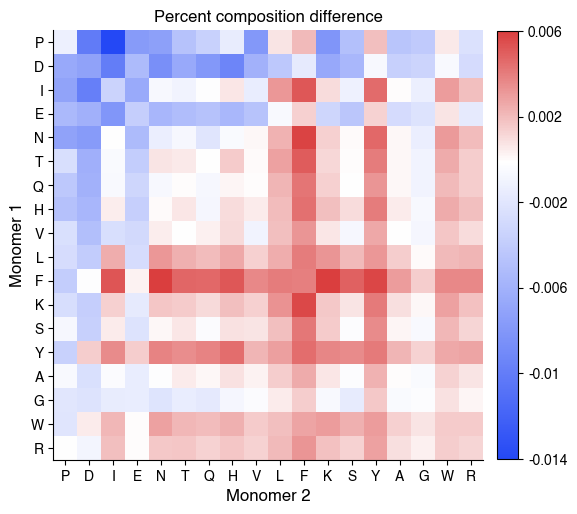

In [6]:
# Pairs
s1_pairs_df = pd.read_csv('../seq/pair/S1_pair_freq.txt', na_filter=False).set_index('Pair')
s4_pairs_df = pd.read_csv('../seq/pair/S4_pair_freq.txt', na_filter=False).set_index('Pair')
pairs_df = s1_pairs_df - s4_pairs_df

# Normalize frequencies to 0-1 for cmapping
max_freq = pairs_df['Frequency'].max()
min_freq = pairs_df['Frequency'].min()
pairs_df['Frequency'] = (pairs_df['Frequency'] - min_freq) / (max_freq - min_freq)
midpoint = -min_freq / (max_freq - min_freq)

# Preserve axes order for approx. grouping of change
pairs_df = pairs_df.sort_values('Frequency')
axes_order = [s[0] for s in pairs_df.index]
axes_order = list(dict.fromkeys(axes_order))
pairs_df = pairs_df.reset_index()

# Reshape df
pairs_df[['p1', 'p2']] = pairs_df['Pair'].str.split('', expand=True)[[1, 2]]
pairs_df = pairs_df[['p1', 'p2', 'Frequency']].pivot(index='p1', columns='p2')['Frequency']
pairs_df = pairs_df.reindex(axes_order)[axes_order]


# Plot
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(6, 6)
gradient = LinearSegmentedColormap.from_list('gradient', (
                                            (0, (0.145, 0.286, 0.961)),
                                            (midpoint, (1.000, 1.000, 1.000)),
                                            (1, (0.855, 0.247, 0.247))))
heatmap = ax.imshow(pairs_df.to_numpy(), cmap=gradient)
cbar = plt.colorbar(heatmap, ax=ax, fraction=0.046, pad=0.03)

# Change colorbar ticks back to %change
locs = [round(i, 3) for i in list(np.arange(0, 1.2, 0.2))]
labels = [round(i, 3) for i in list(np.arange(min_freq, max_freq + 0.004, 0.004))]
cbar.set_ticks(locs)
cbar.set_ticklabels(labels)
                    
# Plot and save
ax.set_title('Percent composition difference', size=12)
ax.set_xticks(range(len(pairs_df)))
ax.set_yticks(range(len(pairs_df)))
ax.set_xticklabels(pairs_df.columns)
ax.set_yticklabels(pairs_df.index)
plt.ylabel('Monomer 1', fontsize=12)
plt.xlabel('Monomer 2', fontsize=12)
plt.savefig('../figs/pair_motif_change.svg', format='svg', dpi=300)
plt.show()